In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

## Final Test Score: 65.8%
## Scoring Metric Used: Recall

# Lab 4: Putting it all together in a mini project

**This lab is an optional group lab.** You can choose to work alone of in a group of up to four students. You are in charge of how you want to work and who you want to work with. Maybe you really want to go through all the steps of the ML process yourself or maybe you want to practice your collaboration skills, it is up to you! Just remember to indicate who your group members are (if any) when you submit on Gradescope. If you choose to work in a group, you only need to use one of your GitHub repos.

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
rubric={mechanics}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Make at least three commits.</li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab and upload it to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells.</li>
    </ul>
  <li>Also upload a <code>.pdf</code> export of the notebook to facilitate grading of manual questions (preferably WebPDF, you can select two files when uploading to gradescope)</li>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  <li>The data you download for this lab <b>SHOULD NOT BE PUSHED TO YOUR REPOSITORY</b> (there is also a <code>.gitignore</code> in the repo to prevent this).</li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

_Points:_ 2

https://github.ubc.ca/MDS-2022-23/DSCI_573_lab4_rdhill13 (TO BE AMENDED)

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. Since this mini-project is open-ended there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you instead do a bunch of sane things and you have clearly motivated your choices, but still get lower model performance than your friend, don't sweat it.


#### A final note
Finally, the style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "several hours" but not "many hours" is a good guideline for a high quality submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
rubric={reasoning}

In this mini project, you will pick one of the following problems: 

1. A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

2. A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)
    
</div>

_Points:_ 3

The problem here is to be able to predict, based on certain characteristics (features), if a person who has taken a loan, will default on the loan or not in the next month. Therefore our target variable here is`default.payment.next.month`. We rename this column to simply call it `default`. The values under this column are 0 for no default and 1 for default. The characteristics available to us to predict whether a person will default or not include their age, gender, education and payment history over the past few months. Based on intuition, the person's payment history should be extremely crucial in making predictions but we will assess if this is true by building different machine learning models and checking the importances of the features

In [2]:
# Imports
import altair as alt
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')
# Include an image for each plot since Gradescope only supports displaying plots as images
alt.renderers.enable('mimetype')

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
cc_df = pd.read_csv('data/UCI_Credit_Card.csv').rename(columns = {"default.payment.next.month":"default"})
cc_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


Upon looking at the dataset in Excel, we noticed there are some individuals with no bill amount at all i.e all BILL_AMT are 0 but still the individuals are being classified as defaulters. We decided to drop these rows.

In [4]:
cc_df = cc_df[cc_df.loc[:,'BILL_AMT1':'BILL_AMT6'].sum(axis=1)!=0]
cc_df.shape

(29130, 25)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 2. Data splitting <a name="2"></a>
rubric={reasoning}

**Your tasks:**

1. Split the data into train and test portions.

> Make the decision on the `test_size` based on the capacity of your laptop. 
    
</div>

_Points:_ 1

##### Further splitting into X_train, y_train, X_test and y_test is done below

In [5]:
train_df, test_df = train_test_split(cc_df, test_size=0.20, random_state=123)

In [6]:
train_df.shape

(23304, 25)

In [7]:
test_df.shape

(5826, 25)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 3. EDA <a name="3"></a>
rubric={viz,reasoning}
    
Perform exploratory data analysis on the train set.

**Your tasks:**

1. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
2. Summarize your initial observations about the data. 
3. Pick appropriate metric/metrics for assessment. 
    
</div>

_Points:_ 6

- Our positive class is 1 under the "default" column.
- We have class imbalance since approximately 22% of the examples are defaulting while 78% are not defaulting. 
- We see that "EDUCATION" has 7 unique categories to it whereas the data dictionary says there should be 6 categories. Categories 5 and 6 both mean "Unknown" and there is an extra category 0. Since there are only 345 observations under Category 0, 5 or 6 in total,  we decided to group all the 3 categories into Category 4  ("others"). 
- Similarly we see an extra category 0 with 54 observations in MARRIAGE which we have included under Category 3 ("others").
- We also noticed that there are some observations in all the "PAY_" columns with values of -2 and 0 which are not defined in the data dictionary. For our project we assume these values are synonymous with -1 or maybe even better.
- The "BILL_AMT_" columns also have negative values which could mean reversals or the individual paid more than the bill amount before the bill was generated.
- There seems to be a high correlation between consecutive PAY_ columns like PAY_2 and PAY_3 etc as well as between consecutive BILL_AMT_ columns.

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23304 entries, 23114 to 20565
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         23304 non-null  int64  
 1   LIMIT_BAL  23304 non-null  float64
 2   SEX        23304 non-null  int64  
 3   EDUCATION  23304 non-null  int64  
 4   MARRIAGE   23304 non-null  int64  
 5   AGE        23304 non-null  int64  
 6   PAY_0      23304 non-null  int64  
 7   PAY_2      23304 non-null  int64  
 8   PAY_3      23304 non-null  int64  
 9   PAY_4      23304 non-null  int64  
 10  PAY_5      23304 non-null  int64  
 11  PAY_6      23304 non-null  int64  
 12  BILL_AMT1  23304 non-null  float64
 13  BILL_AMT2  23304 non-null  float64
 14  BILL_AMT3  23304 non-null  float64
 15  BILL_AMT4  23304 non-null  float64
 16  BILL_AMT5  23304 non-null  float64
 17  BILL_AMT6  23304 non-null  float64
 18  PAY_AMT1   23304 non-null  float64
 19  PAY_AMT2   23304 non-null  float64
 20  PA

In [9]:
train_df.nunique()

ID           23304
LIMIT_BAL       80
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    18706
BILL_AMT2    18421
BILL_AMT3    18124
BILL_AMT4    17776
BILL_AMT5    17333
BILL_AMT6    17028
PAY_AMT1      6885
PAY_AMT2      6843
PAY_AMT3      6505
PAY_AMT4      6025
PAY_AMT5      5966
PAY_AMT6      5987
default          2
dtype: int64

In [10]:
prop_neg = round(train_df['default'].value_counts()[0]/train_df.shape[0],2)
prop_pos = round(train_df['default'].value_counts()[1]/train_df.shape[0],2)

print (f"Proportion of positive class:{prop_pos}")
print (f"Proportion of negative class:{prop_neg}")

Proportion of positive class:0.22
Proportion of negative class:0.78


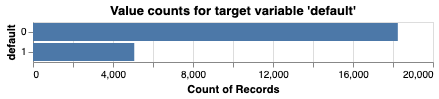

In [11]:
alt.Chart(train_df,title = "Value counts for target variable 'default'").mark_bar().encode(
    y = alt.Y("default:N"),
    x = alt.X("count()"))

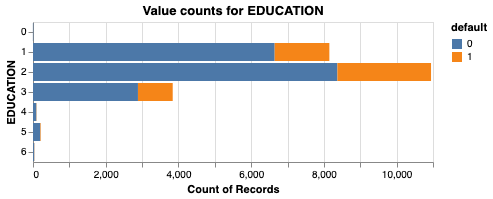

In [12]:
alt.Chart(train_df,title = "Value counts for EDUCATION").mark_bar().encode(
    y = alt.Y("EDUCATION:N"),
    x = alt.X("count()"),
color = alt.Color('default:N'))

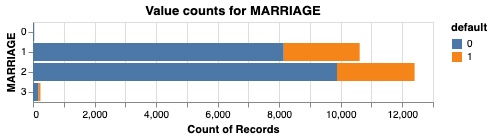

In [13]:
alt.Chart(train_df,title = "Value counts for MARRIAGE").mark_bar().encode(
    y = alt.Y("MARRIAGE:N"),
    x = alt.X("count()"),
color = alt.Color('default:N'))

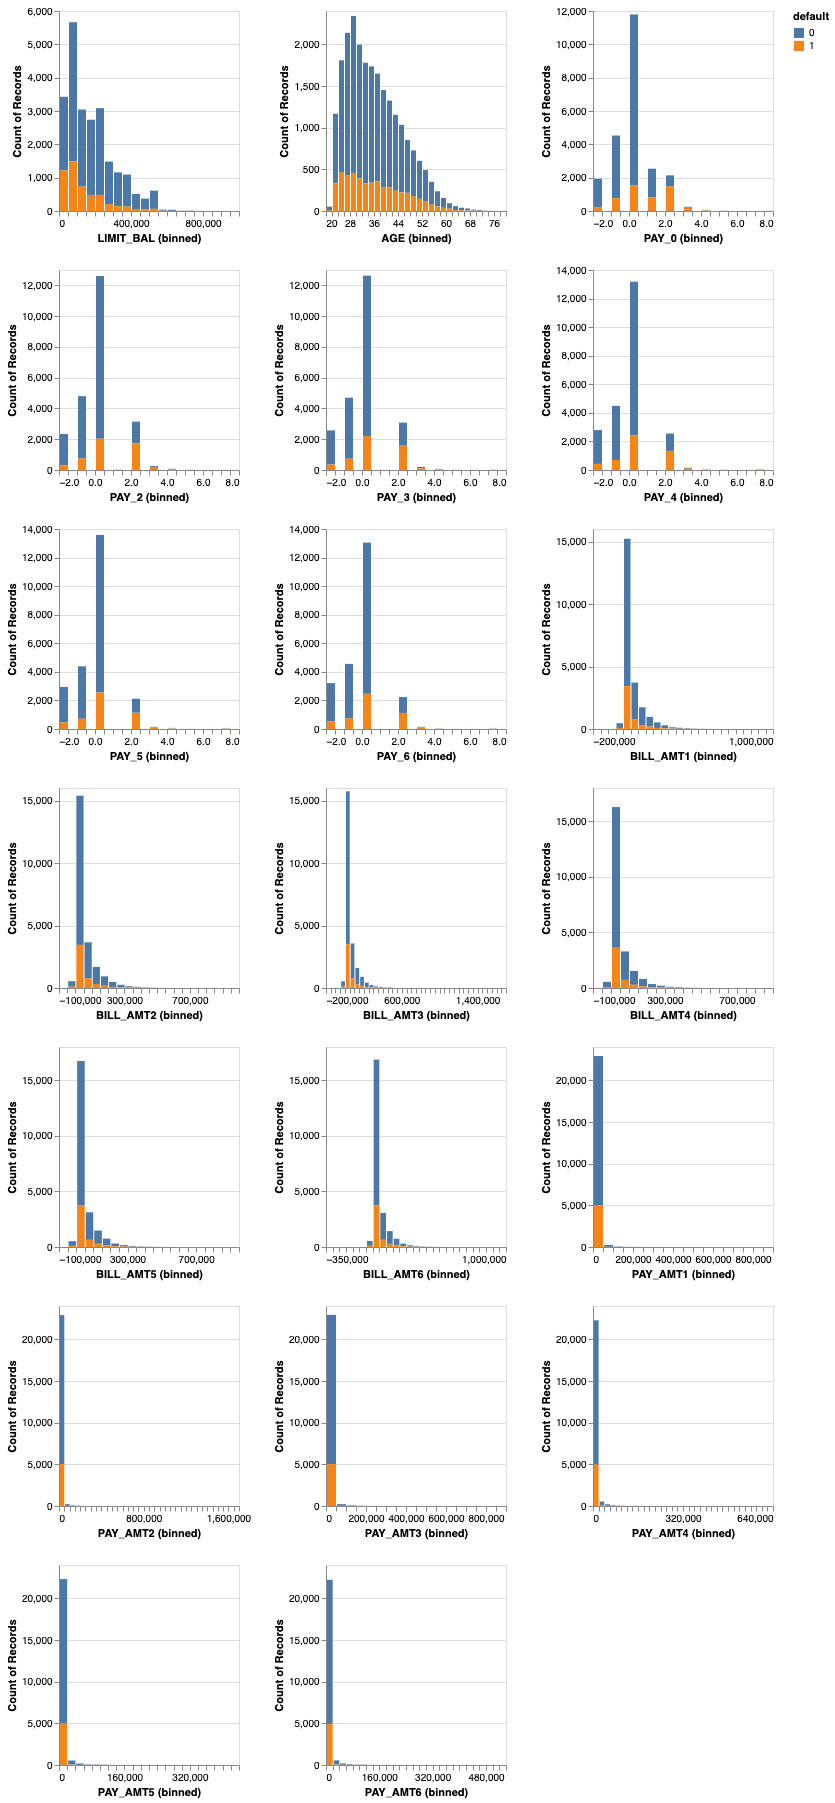

In [14]:
numeric_cols = train_df.select_dtypes(
    include=np.number).drop(
    columns=["ID", "SEX", "default", "MARRIAGE", "EDUCATION"]).columns.to_list()

alt.Chart(train_df).mark_bar().encode(
    alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=40)),
    y='count()',
    color='default:N'
).properties(
    width=180,
    height=200
).repeat(
    numeric_cols, columns=3
)

In [15]:
train_df[numeric_cols].corr('kendall').style.background_gradient()


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.131779,-0.237038,-0.268373,-0.258503,-0.240751,-0.219675,-0.205549,0.092536,0.087368,0.092922,0.096039,0.098858,0.102886,0.228964,0.231723,0.236109,0.233656,0.241166,0.256385
AGE,0.131779,1.000000,-0.050595,-0.060349,-0.060294,-0.058086,-0.059998,-0.056172,0.011452,0.012238,0.012562,0.008041,0.009296,0.008717,0.033434,0.041956,0.032843,0.036711,0.034340,0.035305
PAY_0,-0.237038,-0.050595,1.000000,0.651403,0.547391,0.515548,0.485602,0.456179,0.266036,0.268999,0.258192,0.251179,0.243244,0.235635,-0.077176,-0.045156,-0.041377,-0.026940,-0.020122,-0.034307
PAY_2,-0.268373,-0.060349,0.651403,1.000000,0.744246,0.643324,0.600948,0.556894,0.401564,0.388627,0.362467,0.345491,0.330518,0.317540,-0.044585,0.008570,0.010722,0.019331,0.023161,0.014554
PAY_3,-0.258503,-0.060294,0.547391,0.744246,1.000000,0.746045,0.647590,0.595340,0.361118,0.418469,0.397471,0.375386,0.356580,0.340381,0.121662,-0.032065,0.022285,0.040792,0.044929,0.029804
PAY_4,-0.240751,-0.058086,0.515548,0.643324,0.746045,1.000000,0.771896,0.662369,0.352158,0.393205,0.450043,0.432896,0.404379,0.383764,0.093141,0.148982,-0.009804,0.059728,0.076699,0.067910
PAY_5,-0.219675,-0.059998,0.485602,0.600948,0.647590,0.771896,1.000000,0.770312,0.346392,0.381283,0.426259,0.485475,0.462619,0.428011,0.085656,0.128916,0.160215,0.029647,0.097097,0.093750
PAY_6,-0.205549,-0.056172,0.456179,0.556894,0.595340,0.662369,0.770312,1.000000,0.334737,0.366422,0.400358,0.443267,0.501123,0.471536,0.085051,0.105313,0.139497,0.181310,0.054586,0.110936
BILL_AMT1,0.092536,0.011452,0.266036,0.401564,0.361118,0.352158,0.346392,0.334737,1.000000,0.806192,0.725998,0.656554,0.609968,0.571007,0.367968,0.337232,0.304537,0.305664,0.290182,0.282848
BILL_AMT2,0.087368,0.012238,0.268999,0.388627,0.418469,0.393205,0.381283,0.366422,0.806192,1.000000,0.799521,0.712527,0.652694,0.608829,0.486725,0.364077,0.331197,0.324764,0.313073,0.302004


In [16]:
# recategorizing classses 0, 5, 6 in education as "Others" for train
train_df['EDUCATION'] = train_df['EDUCATION'].replace([0, 5, 6], 4)

# recategorizing class 0 in marriage as "Others" for train
train_df['MARRIAGE'] = train_df['MARRIAGE'].replace(0, 3)

# recategorizing classses 0, 5, 6 in education as "Others" for test
test_df['EDUCATION'] = test_df['EDUCATION'].replace([0, 5, 6], 4)

# recategorizing class 0 in marriage as "Others" for test                
test_df['MARRIAGE'] = test_df['MARRIAGE'].replace(0, 3)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 4. Feature engineering (Challenging)
rubric={reasoning}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.
    
</div>

_Points:_ 0.5

4 new features have been created:
- Max of the pay statuses:
   - This feature reflects the longest the individual has gone without paying a bill throughout their credit payment history as depicted in the dataset. A larger value would indicate an individual did not pay the bill for a long time. 'max' was chosen because this indicates the severity of not paying bills at all by an individual.
- Sum of BILL_AMT_
   - This shows the total amount due for an individual.
- Sum of PAY_AMT_
   - This shows the total amount paid by an individual.
- Average of payment ratio
   - We first calculate the payment ratio per month (e.g. PAY_AMT1/BILL_AMT2 due to time lag), and then take the average. This shows the individual's repayment ability.
   - To deal with division by zero (i.e. BILL_AMT_ is zero), we set the payment ratio of the month to 1.

In [17]:
# creating total_pay for train
train_df = train_df.assign(longest_unpaid_streak=train_df.loc[:, "PAY_0":"PAY_6"].max(axis=1))

# creating total_bill for train
train_df = train_df.assign(total_bill=train_df.loc[:, "BILL_AMT1":"BILL_AMT6"].sum(axis=1))

# creating total_paid for train
train_df = train_df.assign(total_paid=train_df.loc[:, "PAY_AMT1":"PAY_AMT6"].sum(axis=1))

# creating avg_pay_ratio for train (assumption: if bill_amt = 0, pay_ratio = 1)
np_pay_amt = np.array(train_df.loc[:, "PAY_AMT1":"PAY_AMT5"])
np_bill_amt = np.array(train_df.loc[:, "BILL_AMT2":"BILL_AMT6"])
train_df['avg_pay_ratio'] = np.average(np.divide(np_pay_amt, np_bill_amt, out=np.ones_like(np_pay_amt), where=np_bill_amt!=0), axis=1)

# creating total_pay for test
test_df = test_df.assign(longest_unpaid_streak=test_df.loc[:, "PAY_0":"PAY_6"].max(axis=1))

# creating total_bill for test
test_df = test_df.assign(total_bill=test_df.loc[:, "BILL_AMT1":"BILL_AMT6"].sum(axis=1))

# creating total_paid for test
test_df = test_df.assign(total_paid=test_df.loc[:, "PAY_AMT1":"PAY_AMT6"].sum(axis=1))

# creating avg_pay_ratio for test (assumption: if bill_amt = 0, pay_ratio = 1)
np_pay_amt = np.array(test_df.loc[:, "PAY_AMT1":"PAY_AMT5"])
np_bill_amt = np.array(test_df.loc[:, "BILL_AMT2":"BILL_AMT6"])
test_df['avg_pay_ratio'] = np.average(np.divide(np_pay_amt, np_bill_amt, out=np.ones_like(np_pay_amt), where=np_bill_amt!=0), axis=1)

In [18]:
# creating X_train, y_train, X_test and y_test
X_train = train_df.drop(columns='default')
y_train = train_df['default']
X_test = test_df.drop(columns='default')
y_test = test_df['default']

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 5. Preprocessing and transformations <a name="5"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 
    
</div>

_Points:_ 4

- We  drop ID which is an identifier column and SEX due to ethical concerns.
- We treat EDUCATION as an ordinal feature and MARRIAGE as a categorical feature.

In [19]:
drop_features = ['ID', 'SEX']
numeric_features = ['LIMIT_BAL', 'AGE',
                    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                    'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                    'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                    'longest_unpaid_streak', 'total_bill', 'total_paid', 'avg_pay_ratio']
ordinal_features = ['EDUCATION']
categorical_features = ['MARRIAGE']

ordinal_levels = [1, 2, 3, 4]

preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OrdinalEncoder(categories=[ordinal_levels]), ordinal_features),
    (OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_features),
    ("drop", drop_features)   
)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 6. Baseline model <a name="6"></a>
rubric={accuracy}

**Your tasks:**
1. Train a baseline model for your task and report its performance.
    
</div>

_Points:_ 2

In [20]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)

classification_metrics = ["accuracy", "precision", "recall", "f1"]
dc = DummyClassifier()
cross_val_results = {}
cross_val_results['dummy'] = (pd.DataFrame(cross_validate(dc,
                                                         X_train,
                                                         y_train,
                                                         return_train_score=True,
                                                         scoring=classification_metrics))
                              .agg(['mean', 'std']).round(3).T)

# Show the train and validation scores
cross_val_results['dummy']

,mean,std
fit_time,0.002,0.001
score_time,0.003,0.001
test_accuracy,0.783,0.000
train_accuracy,0.783,0.000
test_precision,0.000,0.000
train_precision,0.000,0.000
test_recall,0.000,0.000
train_recall,0.000,0.000
test_f1,0.000,0.000
train_f1,0.000,0.000


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 7. Linear models <a name="7"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.
    
</div>

_Points:_ 8

Loan default is a concern to many banks as this would affect the health of the institution and cause monetary loss. In view of this, catching genuine defaults is our main purpose, we will consider recall as our main metric of choice.

The validation recall score is 65.4% and very close the the training recall (65.3%) which means our model is not overfitting. Further, our logistic regression model automatically deals with the class imbalance by choosing class_weight='balanced' during hyperparameter optimization. However we will try to get better scores by using other models.

In [21]:
from scipy.stats import lognorm, loguniform, randint

pipe_logreg = make_pipeline(preprocessor, LogisticRegression(random_state=123,
                                                        max_iter=1000))

param_dist_logreg = {
    "logisticregression__class_weight": [None, 'balanced'],
    "logisticregression__C": loguniform(1e-3, 1e3)
}

random_search_logreg = RandomizedSearchCV(
    pipe_logreg,
    param_distributions=param_dist_logreg,
    n_jobs=-1, 
    n_iter=20,
    random_state=123,
    return_train_score=True,
    scoring = 'recall'
)
random_search_logreg.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6',
                                                                                'longest_unp...
                                                                               'drop',
                                                                               ['ID',
                                                                                'SEX'])])),
                                             ('logisticregression',
                                              LogisticRegression(max_iter=1000,
                                                                 random_state=123))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x140df71c0>,
                                        'logisticregression__class_weight': [None,
                                                                             'balanced']},
                   random_state=123, return_train_score=True, scoring='recall')

In [22]:
cross_val_results['logreg'] = pd.DataFrame(cross_validate(random_search_logreg.best_estimator_,
                                                          X_train,
                                                          y_train,
                                                          return_train_score=True,
                                                          scoring=classification_metrics)).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['logreg']

,mean,std
fit_time,0.042,0.006
score_time,0.005,0.001
test_accuracy,0.737,0.005
train_accuracy,0.739,0.002
test_precision,0.431,0.006
train_precision,0.433,0.003
test_recall,0.654,0.015
train_recall,0.653,0.002
test_f1,0.519,0.004
train_f1,0.521,0.003


In [24]:
random_search_logreg.best_params_

{'logisticregression__C': 2.0318358298265977,
 'logisticregression__class_weight': 'balanced'}

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 8. Different models <a name="8"></a>
rubric={accuracy,reasoning}

**Your tasks:**
1. Try out three other models aside from the linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat the performance of the linear model? 
    
</div>

_Points:_ 10

We will use the following non-linear models:
   - Naive Bayes
   - RandomForestClassifier
   - LGBM

**RECALL VERSION** (CHOOSE ONE)<br>
Based on the results, Naive Bayes is outstanding in terms of recall score. The validation score for Naive Bayes is 86.5%, followed by logistic regression (65.4%) and LGBM (61%). In addition, Naive Bayes does not overfit at all because of the comparable test score and validation score. On the other hand, overfitting is observed in Random Forest and LGBM. We will further improve our models using feature selection and hyperparameter optimization.


# Naive Bayes

In [27]:
NB_bal = make_pipeline(preprocessor, GaussianNB())

cross_val_results['NB_bal'] = pd.DataFrame(cross_validate(NB_bal,
                                  X_train,
                                  y_train,
                                  return_train_score=True,
                                  scoring=classification_metrics)).agg(['mean', 'std']).round(3).T
# Show the train and validation scores
cross_val_results['NB_bal']

,mean,std
fit_time,0.011,0.001
score_time,0.006,0.000
test_accuracy,0.434,0.032
train_accuracy,0.434,0.032
test_precision,0.260,0.009
train_precision,0.260,0.008
test_recall,0.865,0.022
train_recall,0.866,0.029
test_f1,0.399,0.008
train_f1,0.399,0.006


# Random Forest

In [26]:
RF_bal = make_pipeline(preprocessor,
                       RandomForestClassifier(class_weight="balanced", random_state=123))

cross_val_results['RF_bal'] = pd.DataFrame(cross_validate(RF_bal,
                                                          X_train,
                                                          y_train,
                                                          return_train_score=True,
                                                          scoring=classification_metrics)).agg(['mean', 'std']).round(3).T
# Show the train and validation scores
cross_val_results['RF_bal'] 

,mean,std
fit_time,3.262,0.024
score_time,0.059,0.001
test_accuracy,0.821,0.002
train_accuracy,1.000,0.000
test_precision,0.674,0.017
train_precision,1.000,0.000
test_recall,0.345,0.012
train_recall,1.000,0.000
test_f1,0.456,0.008
train_f1,1.000,0.000


# Light GBM

In [28]:
from lightgbm.sklearn import LGBMClassifier

LGBM_bal = make_pipeline(preprocessor,
                         LGBMClassifier(class_weight="balanced", random_state=123))

cross_val_results['LGBM_bal'] = pd.DataFrame(cross_validate(LGBM_bal,
                                                            X_train,
                                                            y_train,
                                                            return_train_score=True,
                                                            scoring=classification_metrics)).agg(['mean', 'std']).round(3).T
# Show the train and validation scores
cross_val_results['LGBM_bal']

,mean,std
fit_time,0.355,0.010
score_time,0.010,0.001
test_accuracy,0.768,0.006
train_accuracy,0.830,0.003
test_precision,0.474,0.009
train_precision,0.582,0.007
test_recall,0.610,0.018
train_recall,0.778,0.009
test_f1,0.533,0.005
train_f1,0.666,0.005


In [29]:
combined_results = pd.concat(
    cross_val_results,
    axis='columns'
).xs(
    'mean',
    axis='columns',
    level=1
).style.format(
    precision=3
)

combined_results

,dummy,logreg,NB_bal,RF_bal,LGBM_bal
fit_time,0.002,0.042,0.011,3.262,0.355
score_time,0.003,0.005,0.006,0.059,0.010
test_accuracy,0.783,0.737,0.434,0.821,0.768
train_accuracy,0.783,0.739,0.434,1.000,0.830
test_precision,0.000,0.431,0.260,0.674,0.474
train_precision,0.000,0.433,0.260,1.000,0.582
test_recall,0.000,0.654,0.865,0.345,0.610
train_recall,0.000,0.653,0.866,1.000,0.778
test_f1,0.000,0.519,0.399,0.456,0.533
train_f1,0.000,0.521,0.399,1.000,0.666


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 9. Feature selection (Challenging)
rubric={reasoning}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises unless you think there are other benefits with using less features.
    
</div>

_Points:_ 0.5

We'll use RFECV to reduce the feature space, using RidgeClassifier to generate feature importance.

We are starting with 28 features. Using RidgeClassifier to reduce the feature space leaves us with the 5 most important features.

Key findings: 
* Using feature selection leads to
    * better validation score for random forest;
        * Reducing the number of features does slightly reduce overfitting, we will keep the feature selection in the pipeline for random forest.
    * marginally worse validation score for logistic regression and LGBM;
        * The reduction in the scores is extremely small. By removing 23 features, we are significantly reducing the complexity of our model. So for both models we will keep the RFECV step, using only the subset of 5 features in our model.
    * significantly worse validation score for Naive Bayes;
        * Since no improvement is observed, we will abandon the feature selection in the pipeline for Naive Bayes


# Logistic Regression

In [30]:
#Baseline feature counts

pipe_logreg.fit(X_train, y_train) 
pipe_logreg.named_steps["logisticregression"].n_features_in_

28

In [31]:
# Linear Classifier

from sklearn.feature_selection import RFECV
from sklearn.linear_model import RidgeClassifier

logreg_RFE = make_pipeline(preprocessor,
                           RFECV(RidgeClassifier(), cv=10),
                           LogisticRegression(class_weight="balanced",
                                              random_state=123,
                                              max_iter=1000))

param_dist = {
    "logisticregression__class_weight": [None, 'balanced'],
    "logisticregression__C": loguniform(1e-3, 1e3)
}

random_search_logreg_RFE = RandomizedSearchCV(
    logreg_RFE,
    param_distributions=param_dist,
    n_jobs=-1, 
    n_iter=20,
    random_state=123,
    return_train_score=True,
    scoring='recall'
)
random_search_logreg_RFE.fit(X_train, y_train)

cross_val_results['logreg_RFE'] = pd.DataFrame(cross_validate(random_search_logreg_RFE.best_estimator_,
                                                          X_train,
                                                          y_train,
                                                          return_train_score=True,
                                                          scoring=classification_metrics)).agg(['mean', 'std']).round(3).T


In [32]:
df = pd.concat([cross_val_results['logreg'], cross_val_results['logreg_RFE']], axis=1)
df.columns=['logreg mean', 'logreg std', 'logreg_RFE mean', 'logreg_RFE std']
df

,logreg mean,logreg std,logreg_RFE mean,logreg_RFE std
fit_time,0.042,0.006,1.101,0.013
score_time,0.005,0.001,0.005,0.000
test_accuracy,0.737,0.005,0.739,0.006
train_accuracy,0.739,0.002,0.739,0.003
test_precision,0.431,0.006,0.432,0.007
train_precision,0.433,0.003,0.433,0.004
test_recall,0.654,0.015,0.642,0.017
train_recall,0.653,0.002,0.643,0.009
test_f1,0.519,0.004,0.517,0.004
train_f1,0.521,0.003,0.517,0.003


In [33]:
# Resulting number of features

logreg_RFE.fit(X_train, y_train)
logreg_RFE.named_steps["logisticregression"].n_features_in_

5

# Naive Bayes

In [37]:
# Naive Bayes

NB_bal_RFE = make_pipeline(preprocessor, RFECV(RidgeClassifier(), cv=10), GaussianNB())

cross_val_results['NB_bal_RFE'] = pd.DataFrame(cross_validate(NB_bal_RFE,
                                                          X_train,
                                                          y_train,
                                                          return_train_score=True,
                                                          scoring=classification_metrics)).agg(['mean', 'std']).round(3).T


In [38]:
df = pd.concat([cross_val_results['NB_bal'], cross_val_results['NB_bal_RFE']], axis=1)
df.columns=['NB_bal mean', 'NB_bal std', 'NB_bal_RFE mean', 'NB_bal_RFE std']
df

,NB_bal mean,NB_bal std,NB_bal_RFE mean,NB_bal_RFE std
fit_time,0.011,0.001,1.143,0.031
score_time,0.006,0.000,0.005,0.000
test_accuracy,0.434,0.032,0.809,0.005
train_accuracy,0.434,0.032,0.809,0.003
test_precision,0.260,0.009,0.569,0.015
train_precision,0.260,0.008,0.570,0.010
test_recall,0.865,0.022,0.500,0.022
train_recall,0.866,0.029,0.501,0.004
test_f1,0.399,0.008,0.532,0.013
train_f1,0.399,0.006,0.533,0.003


In [39]:
NB_bal_RFE.fit(X_train,y_train)
NB_bal_RFE.named_steps['gaussiannb'].n_features_in_

5

# Random Forest

In [40]:
# Random Forests

RF_bal_RFE = make_pipeline(preprocessor,
                           RFECV(RidgeClassifier(), cv=10),
                           RandomForestClassifier(class_weight="balanced", random_state=123))

cross_val_results['RF_bal_RFE'] = pd.DataFrame(cross_validate(RF_bal_RFE,
                                                          X_train,
                                                          y_train,
                                                          return_train_score=True,
                                                          scoring=classification_metrics)).agg(['mean', 'std']).round(3).T


In [41]:
df = pd.concat([cross_val_results['RF_bal'], cross_val_results['RF_bal_RFE']], axis=1)
df.columns=['RF_bal mean', 'RF_bal std', 'RF_bal_RFE mean', 'RF_bal_RFE std']
df

,RF_bal mean,RF_bal std,RF_bal_RFE mean,RF_bal_RFE std
fit_time,3.262,0.024,2.481,0.324
score_time,0.059,0.001,0.065,0.002
test_accuracy,0.821,0.002,0.768,0.048
train_accuracy,1.000,0.000,0.987,0.011
test_precision,0.674,0.017,0.497,0.152
train_precision,1.000,0.000,0.965,0.032
test_recall,0.345,0.012,0.378,0.024
train_recall,1.000,0.000,0.978,0.020
test_f1,0.456,0.008,0.419,0.043
train_f1,1.000,0.000,0.971,0.026


In [42]:
RF_bal_RFE.fit(X_train,y_train)
RF_bal_RFE.named_steps['randomforestclassifier'].n_features_in_

5

# LGBM

In [43]:
LGBM_bal_RFE = make_pipeline(preprocessor,
                             RFECV(RidgeClassifier(), cv=10),
                             LGBMClassifier(class_weight="balanced", random_state=123))

cross_val_results['LGBM_bal_RFE'] = pd.DataFrame(cross_validate(LGBM_bal_RFE,
                                                          X_train,
                                                          y_train,
                                                          return_train_score=True,
                                                          scoring=classification_metrics)).agg(['mean', 'std']).round(3).T


In [44]:
df = pd.concat([cross_val_results['LGBM_bal'], cross_val_results['LGBM_bal_RFE']], axis=1)
df.columns=['LGBM_bal mean', 'LGBM_bal std', 'LGBM_bal_RFE mean', 'LGBM_bal_RFE std']
df

,LGBM_bal mean,LGBM_bal std,LGBM_bal_RFE mean,LGBM_bal_RFE std
fit_time,0.355,0.010,1.402,0.018
score_time,0.010,0.001,0.009,0.001
test_accuracy,0.768,0.006,0.765,0.009
train_accuracy,0.830,0.003,0.792,0.011
test_precision,0.474,0.009,0.469,0.015
train_precision,0.582,0.007,0.516,0.019
test_recall,0.610,0.018,0.603,0.022
train_recall,0.778,0.009,0.675,0.060
test_f1,0.533,0.005,0.527,0.002
train_f1,0.666,0.005,0.584,0.034


In [45]:
LGBM_bal_RFE.fit(X_train,y_train)
LGBM_bal_RFE.named_steps['lgbmclassifier'].n_features_in_

5

In [46]:
combined_results_fs = pd.concat(
    cross_val_results,
    axis='columns'
).xs(
    'mean',
    axis='columns',
    level=1
).style.format(
   precision=3
)

combined_results_fs
col_list = combined_results_fs.columns.tolist()
col_list.sort()
col_list
combined_results_fs = combined_results_fs.data
combined_results_fs[col_list]

,LGBM_bal,LGBM_bal_RFE,NB_bal,NB_bal_RFE,RF_bal,RF_bal_RFE,dummy,logreg,logreg_RFE
fit_time,0.355,1.402,0.011,1.143,3.262,2.481,0.002,0.042,1.101
score_time,0.010,0.009,0.006,0.005,0.059,0.065,0.003,0.005,0.005
test_accuracy,0.768,0.765,0.434,0.809,0.821,0.768,0.783,0.737,0.739
train_accuracy,0.830,0.792,0.434,0.809,1.000,0.987,0.783,0.739,0.739
test_precision,0.474,0.469,0.260,0.569,0.674,0.497,0.000,0.431,0.432
train_precision,0.582,0.516,0.260,0.570,1.000,0.965,0.000,0.433,0.433
test_recall,0.610,0.603,0.865,0.500,0.345,0.378,0.000,0.654,0.642
train_recall,0.778,0.675,0.866,0.501,1.000,0.978,0.000,0.653,0.643
test_f1,0.533,0.527,0.399,0.532,0.456,0.419,0.000,0.519,0.517
train_f1,0.666,0.584,0.399,0.533,1.000,0.971,0.000,0.521,0.517


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 10. Hyperparameter optimization
rubric={accuracy,reasoning}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 
    
</div>

_Points:_ 6

We first performed hyperparamater optimization on all the models that we built above. Below are the version of each estimator that we chose based on the hyperparameterized results:
- Logisitic Regression: logreg_RFE which is Logistic Regression with optimized hyperparameters and with feature selection. It gives us an validation score of 64.2%

- Naive Bayes: NB_bal and NB_opt give us the same validation scores (86.5%). i.e. no difference.
 
- Random Forest: RF_opt which is Random Forest with optimized hyperparameters and with feature selection. It gives us a validation score of 61.3%. Using hyperparameter optimization we have managed to reduce overfitting by a significant amount.
 
- LGBM: LGBM_Opt which is LGBM with optimized hyperparameters and with feature selection. It gives us a validation score of 62.8%. Similarly, overfitting has been reduced significantly.

After performing hyperparmeter optimization, we then performed a voting average of all these models in order to benefit from diversification. We can see that our averaged model gives us a validation score of 71.3%, lower than our best model NB_opt's 86.5% but the averaged model gives a better AP score and better diversification. So we choose the averaged model as our best model.

# Naive Bayes

In [52]:
param_dist_nb = {
    "gaussiannb__var_smoothing": np.logspace(0, -9, num=100)
}

random_search_NB = RandomizedSearchCV(
    NB_bal,
    param_distributions=param_dist_nb,
    n_jobs=-1, 
    n_iter=20,
    random_state=123,
    return_train_score=True,
    scoring='recall'
)

In [53]:
random_search_NB.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6',
                                                                                'longest_unp...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=123, return_train_score=True, scoring='recall')

In [54]:
random_search_NB.best_params_

{'gaussiannb__var_smoothing': 4.3287612810830526e-07}

In [55]:
cross_val_results['NB_opt'] = pd.DataFrame(
    cross_validate(random_search_NB.best_estimator_,
                   X_train,
                   y_train,
                   return_train_score=True,
                   scoring=classification_metrics)).agg(['mean', 'std']).round(3).T
# Show the train and validation scores
cross_val_results['NB_opt'] 

,mean,std
fit_time,0.014,0.005
score_time,0.006,0.001
test_accuracy,0.434,0.032
train_accuracy,0.434,0.032
test_precision,0.260,0.009
train_precision,0.260,0.008
test_recall,0.865,0.022
train_recall,0.866,0.029
test_f1,0.399,0.008
train_f1,0.399,0.006


# Random Forest

In [56]:
param_dist_rf = {
    "randomforestclassifier__n_estimators": randint(0,100),
    "randomforestclassifier__max_depth": randint(0,20),
    "randomforestclassifier__class_weight": [None, 'balanced']
}

random_search_RF = RandomizedSearchCV(
    RF_bal_RFE,
    param_distributions=param_dist_rf,
    n_jobs=-1, 
    n_iter=20,
    random_state=123,
    return_train_score=True,
    scoring='recall'
)

In [57]:
random_search_RF.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6',
                                                                                'longest_unp...
                   param_distributions={'randomforestclassifier__class_weight': [None,
                                                                                 'balanced'],
                                        'randomforestclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x140f90c40>,
                                        'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x140babeb0>},
                   random_state=123, return_train_score=True, scoring='recall')

In [58]:
random_search_RF.best_params_

{'randomforestclassifier__class_weight': 'balanced',
 'randomforestclassifier__max_depth': 2,
 'randomforestclassifier__n_estimators': 97}

In [59]:
cross_val_results['RF_opt'] = pd.DataFrame(
    cross_validate(random_search_RF.best_estimator_,
                   X_train,
                   y_train,
                   return_train_score=True,
                   scoring=classification_metrics,
                  n_jobs=-1)).agg(['mean', 'std']).round(3).T
# Show the train and validation scores
cross_val_results['RF_opt'] 

,mean,std
fit_time,2.591,0.069
score_time,0.022,0.003
test_accuracy,0.763,0.010
train_accuracy,0.763,0.005
test_precision,0.466,0.017
train_precision,0.465,0.007
test_recall,0.613,0.011
train_recall,0.615,0.006
test_f1,0.529,0.010
train_f1,0.530,0.003


# LGBM

In [60]:
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings(action='ignore', category=FitFailedWarning)

param_dist_lgbm = {
    "lgbmclassifier__learning_rate": [0.001, 0.005, 0.01, 0.05, 0.1],
    "lgbmclassifier__n_estimators": randint(0, 100),
    "lgbmclassifier__max_depth": randint(0, 20),
    "lgbmclassifier__num_leaves": [1, 10, 25, 50, 100],
    "lgbmclassifier__min_data_in_leaf": [100, 250, 500, 750, 1000, 3000],
}

random_search_LGBM = RandomizedSearchCV(
    LGBM_bal_RFE,
    param_distributions=param_dist_lgbm,
    n_jobs=-1, 
    n_iter=20,
    random_state=123,
    return_train_score=True,
    # scoring='f1',
    scoring='recall',
)

In [61]:
random_search_LGBM.fit(X_train, y_train)

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check fai

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6',
                                                                                'longest_unp...
                                        'lgbmclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x140f90820>,
                                        'lgbmclassifier__min_data_in_leaf': [100,
                                                                             250,
                                                                             500,
                                                                             750,
                                                                             1000,
                                                                             3000],
                                        'lgbmclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1413a9ff0>,
                                        'lgbmclassifier__num_leaves': [1, 10,
                                                                       25, 50,
                                                                       100]},
                   random_state=123, return_train_score=True, scoring='recall')

In [62]:
random_search_LGBM.best_params_

{'lgbmclassifier__learning_rate': 0.05,
 'lgbmclassifier__max_depth': 10,
 'lgbmclassifier__min_data_in_leaf': 3000,
 'lgbmclassifier__n_estimators': 64,
 'lgbmclassifier__num_leaves': 50}

In [63]:
cross_val_results['LGBM_opt'] = pd.DataFrame(
    cross_validate(random_search_LGBM.best_estimator_,
                   X_train,
                   y_train,
                   return_train_score=True,
                   scoring=classification_metrics)).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['LGBM_opt'] 

[LightGBM] [Warning] min_data_in_leaf is set=3000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3000
[LightGBM] [Warning] min_data_in_leaf is set=3000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3000
[LightGBM] [Warning] min_data_in_leaf is set=3000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3000
[LightGBM] [Warning] min_data_in_leaf is set=3000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3000


,mean,std
fit_time,1.148,0.039
score_time,0.006,0.000
test_accuracy,0.754,0.013
train_accuracy,0.753,0.009
test_precision,0.453,0.018
train_precision,0.452,0.012
test_recall,0.628,0.024
train_recall,0.630,0.011
test_f1,0.526,0.007
train_f1,0.526,0.005


In [64]:
combined_results_opt = pd.concat(
    cross_val_results,
    axis='columns'
).xs(
    'mean',
    axis='columns',
    level=1
).style.format(
    precision=3
)

col_list_opt = combined_results_opt.columns.tolist()
col_list_opt.sort()
col_list_opt
combined_results_opt = combined_results_opt.data
combined_results_opt[col_list_opt]

,LGBM_bal,LGBM_bal_RFE,LGBM_opt,NB_bal,NB_bal_RFE,NB_opt,RF_bal,RF_bal_RFE,RF_opt,dummy,logreg,logreg_RFE
fit_time,0.355,1.402,1.148,0.011,1.143,0.014,3.262,2.481,2.591,0.002,0.042,1.101
score_time,0.010,0.009,0.006,0.006,0.005,0.006,0.059,0.065,0.022,0.003,0.005,0.005
test_accuracy,0.768,0.765,0.754,0.434,0.809,0.434,0.821,0.768,0.763,0.783,0.737,0.739
train_accuracy,0.830,0.792,0.753,0.434,0.809,0.434,1.000,0.987,0.763,0.783,0.739,0.739
test_precision,0.474,0.469,0.453,0.260,0.569,0.260,0.674,0.497,0.466,0.000,0.431,0.432
train_precision,0.582,0.516,0.452,0.260,0.570,0.260,1.000,0.965,0.465,0.000,0.433,0.433
test_recall,0.610,0.603,0.628,0.865,0.500,0.865,0.345,0.378,0.613,0.000,0.654,0.642
train_recall,0.778,0.675,0.630,0.866,0.501,0.866,1.000,0.978,0.615,0.000,0.653,0.643
test_f1,0.533,0.527,0.526,0.399,0.532,0.399,0.456,0.419,0.529,0.000,0.519,0.517
train_f1,0.666,0.584,0.526,0.399,0.533,0.399,1.000,0.971,0.530,0.000,0.521,0.517


In [65]:
final_classifiers =  {
    "logistic regression": random_search_logreg_RFE,
    "random forest": random_search_RF,
    "LightGBM": random_search_LGBM,
    "Naive Bayes": random_search_NB
}

In [66]:
from sklearn.ensemble import VotingClassifier

averaged_model = VotingClassifier(
    list(final_classifiers.items()), voting='soft')

In [67]:
cross_val_results['averaged'] = pd.DataFrame(
    cross_validate(averaged_model,
                   X_train,
                   y_train,
                   return_train_score=True,
                   scoring=classification_metrics)).agg(['mean', 'std']).round(3).T

cross_val_results['averaged']

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check fai

[LightGBM] [Warning] min_data_in_leaf is set=3000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3000


[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check fai

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check fai

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check fai

[LightGBM] [Warning] min_data_in_leaf is set=3000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3000


[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check fai

[LightGBM] [Warning] min_data_in_leaf is set=3000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3000


,mean,std
fit_time,154.441,26.866
score_time,0.033,0.011
test_accuracy,0.658,0.097
train_accuracy,0.658,0.098
test_precision,0.373,0.066
train_precision,0.373,0.068
test_recall,0.713,0.076
train_recall,0.716,0.072
test_f1,0.482,0.042
train_f1,0.483,0.045


In [68]:
averaged_model.fit(X_train,y_train)

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917279858/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check fai

[LightGBM] [Warning] min_data_in_leaf is set=3000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3000


VotingClassifier(estimators=[('logistic regression',
                              RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                                                            ColumnTransformer(transformers=[('standardscaler',
                                                                                                             StandardScaler(),
                                                                                                             ['LIMIT_BAL',
                                                                                                              'AGE',
                                                                                                              'PAY_0',
                                                                                                              'PAY_2',
                                                                                                              'PAY_3',
                                                                                                              'PAY_4',
                                                                                                              'PAY_5',
                                                                                                              'PAY_6',
                                                                                                              'BILL_AMT1',
                                                                                                              'BILL_AMT2',
                                                                                                              'BILL_AMT3',
                                                                                                              'BILL_AMT4',
                                                                                                              'BILL_AMT5',
                                                                                                              'BILL_AMT6',
                                                                                                              'PAY_AMT1',
                                                                                                              'PAY_AMT2',
                                                                                                              'PAY_...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                                                 random_state=123,
                                                 return_train_score=True,
                                                 scoring='recall'))],
                 voting='soft')

AttributeError: 'VotingClassifier' object has no attribute 'best_params_'

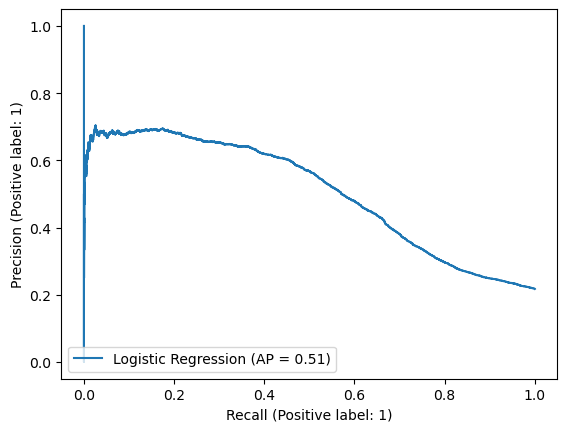

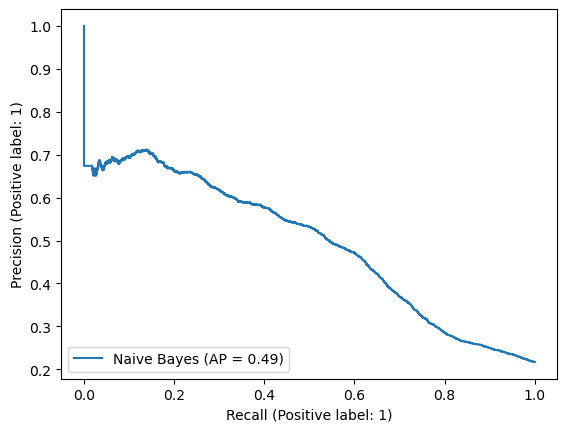

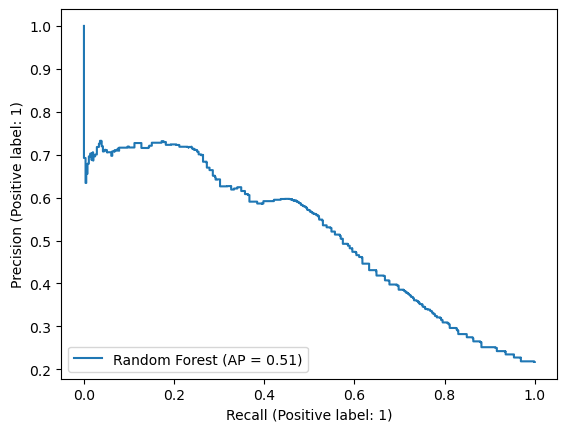

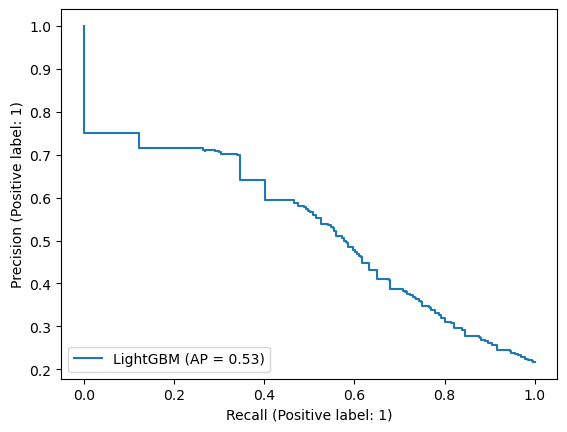

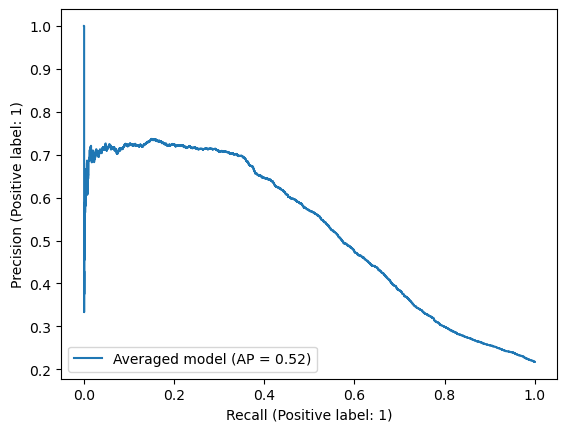

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(random_search_logreg, X_train, y_train,name = "Logistic Regression")
PrecisionRecallDisplay.from_estimator(random_search_NB, X_train, y_train,name = "Naive Bayes")
PrecisionRecallDisplay.from_estimator(random_search_RF, X_train, y_train,name = "Random Forest")
PrecisionRecallDisplay.from_estimator(random_search_LGBM, X_train, y_train,name = "LightGBM")
PrecisionRecallDisplay.from_estimator(averaged_model, X_train, y_train,name = "Averaged model")


In [71]:
combined_results_opt = pd.concat(
    cross_val_results,
    axis='columns'
).xs(
    'mean',
    axis='columns',
    level=1
).style.format(
    precision=3
)

col_list_opt = combined_results_opt.columns.tolist()
col_list_opt.sort()
col_list_opt
combined_results_opt = combined_results_opt.data
combined_results_opt[col_list_opt]

,LGBM_bal,LGBM_bal_RFE,LGBM_opt,NB_bal,NB_bal_RFE,NB_opt,RF_bal,RF_bal_RFE,RF_opt,averaged,dummy,logreg,logreg_RFE
fit_time,0.355,1.402,1.148,0.011,1.143,0.014,3.262,2.481,2.591,154.441,0.002,0.042,1.101
score_time,0.010,0.009,0.006,0.006,0.005,0.006,0.059,0.065,0.022,0.033,0.003,0.005,0.005
test_accuracy,0.768,0.765,0.754,0.434,0.809,0.434,0.821,0.768,0.763,0.658,0.783,0.737,0.739
train_accuracy,0.830,0.792,0.753,0.434,0.809,0.434,1.000,0.987,0.763,0.658,0.783,0.739,0.739
test_precision,0.474,0.469,0.453,0.260,0.569,0.260,0.674,0.497,0.466,0.373,0.000,0.431,0.432
train_precision,0.582,0.516,0.452,0.260,0.570,0.260,1.000,0.965,0.465,0.373,0.000,0.433,0.433
test_recall,0.610,0.603,0.628,0.865,0.500,0.865,0.345,0.378,0.613,0.713,0.000,0.654,0.642
train_recall,0.778,0.675,0.630,0.866,0.501,0.866,1.000,0.978,0.615,0.716,0.000,0.653,0.643
test_f1,0.533,0.527,0.526,0.399,0.532,0.399,0.456,0.419,0.529,0.482,0.000,0.519,0.517
train_f1,0.666,0.584,0.526,0.399,0.533,0.399,1.000,0.971,0.530,0.483,0.000,0.521,0.517


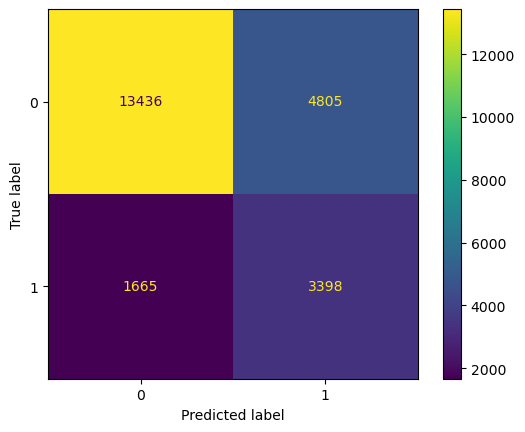

In [72]:
ConfusionMatrixDisplay.from_estimator(averaged_model, X_train, y_train )

In [73]:
from sklearn.metrics import classification_report

print(
    classification_report(
        y_train, averaged_model.predict(X_train)
    )
)


              precision    recall  f1-score   support

           0       0.89      0.74      0.81     18241
           1       0.41      0.67      0.51      5063

    accuracy                           0.72     23304
   macro avg       0.65      0.70      0.66     23304
weighted avg       0.79      0.72      0.74     23304



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 11. Interpretation and feature importances <a name="1"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 
    
</div>

_Points:_ 8

Based on eli5, permutation importance, and SHAP we can see that `PAY_0` and `longest_unpaid_streak` are extremely significant in the LGBM model. This makes reasonable sense, as an individual starting the payment period already having an unpaid balance (`PAY_0`) is likely to continue to not pay and eventually default, and individuals with longer extended streaks of not paying (`longest_unpaid_streak`) are more likely to eventually default.

Interestingly, total bill amount, total pay amount and average payment ratio are not selected as significant features in our model.


In [74]:
indices = random_search_LGBM.best_estimator_.named_steps["rfecv"].get_support(indices=True).tolist()
features = numeric_features + ['EDUCATION', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']
feature_names = [features[i] for i in indices]

# extracting names of relevant features passed through transformer and RFE

In [75]:
import eli5
eli5.explain_weights(random_search_LGBM.best_estimator_.named_steps["lgbmclassifier"], feature_names=feature_names)

Weight,Feature
0.5919,longest_unpaid_streak
0.2926,PAY_0
0.0594,PAY_2
0.0511,BILL_AMT1
0.0050,MARRIAGE_1


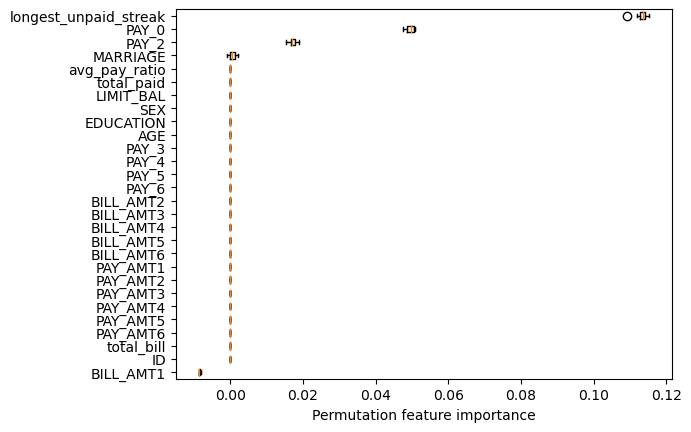

In [76]:
from sklearn.inspection import permutation_importance

# adapted from "get_permutation_importance" function from 573 Lec 8
perm_imp = permutation_importance(random_search_LGBM.best_estimator_, X_train, y_train, n_repeats=10, random_state=123)
perm_imp_sorted = perm_imp.importances_mean.argsort()
plt.boxplot(
    perm_imp.importances[perm_imp_sorted].T,
    vert=False,
    labels=X_train.columns[perm_imp_sorted])
plt.xlabel('Permutation feature importance')
plt.show()


In [77]:
X_train_transformed = pd.DataFrame(data = preprocessor.transform(X_train)[:,indices], 
                                   columns = feature_names, 
                                   index=X_train.index)
# Select only `indices` columns of the dataframe and this should work

/opt/miniconda3/envs/573/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


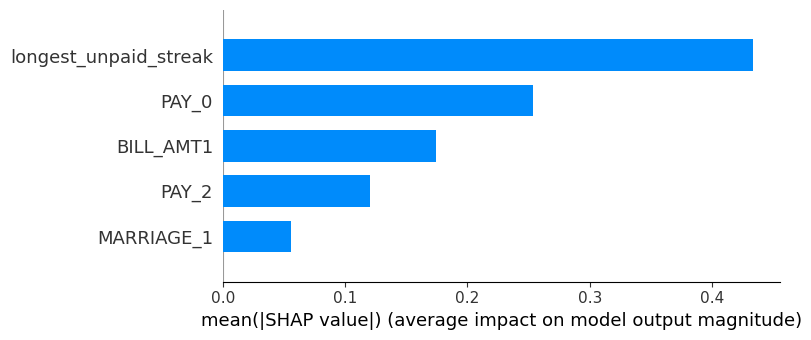

In [78]:
import shap
lgbm_shap = shap.TreeExplainer(random_search_LGBM.best_estimator_.named_steps["lgbmclassifier"])
training_shap = lgbm_shap.shap_values(X_train_transformed)

shap.summary_plot(training_shap[1], X_train_transformed, plot_type = 'bar')


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 12. Results on the test set <a name="12"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  
    
</div>

_Points:_ 6

The recall score on our test dataset is 65.8% which is slightly lower than our train and validation scores. This is reasonable and makes sense. So our model is performing well. We do not have optimization bias because our dataset is large enough and we used pipeline to perform cross-validation. Also, we do not observe overfitting from the score.

We take one default=0 and one default=1 predictions and perform SHAP force plots.

default=0:
- This individual has a negative longest_unpaid_streak which is a sign of a good repayment record. (factor pushing to default=0)
- He/she has very low PAY_0 and PAY_2. That means there is no repayment issue with in recent months. (factor pushing to default=0)
- He/she is married. This is a slightly negative factor according to our model but this only offsets the effect of the above a little bit. (factor pushing to default=1)
- Summing up all the factors, this prediction for this individual is no default which matches the actual.

default=1:
- This individual has a relatively large longest_unpaid_streak which is a negative sign. (factor pushing to default=1)
- He/she has a quite high PAY_0. That means he already has repayment issue in the very recent month. (factor pushing to default=1)
- These two factors are already strong enough to predict this individual will default, which matches the actual.

In [80]:
from sklearn.metrics import f1_score, recall_score

recall_score(y_test, averaged_model.predict(X_test))

0.6584394904458599

In [81]:
lgbm_explainer = shap.TreeExplainer(random_search_LGBM.best_estimator_.named_steps["lgbmclassifier"])
X_test_transformed = pd.DataFrame(data = preprocessor.transform(X_test)[:,indices], 
                                   columns = feature_names, 
                                   index=X_test.index)
test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_transformed)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [82]:
y_test_reset = y_test.reset_index(drop=True)

defaultN_ind = y_test_reset[y_test_reset == 0].index.tolist()
defaultY_ind = y_test_reset[y_test_reset == 1].index.tolist()

ex_defaultN_index = defaultN_ind[9]
ex_defaultY_index = defaultY_ind[10]

In [83]:
X_test_transformed.iloc[ex_defaultN_index]

PAY_0                    0.010009
PAY_2                    0.066240
BILL_AMT1                3.968337
longest_unpaid_streak   -0.345348
MARRIAGE_1               1.000000
Name: 11992, dtype: float64

In [84]:
# hard prediction
random_search_LGBM.best_estimator_.named_steps["lgbmclassifier"].predict(X_test_transformed)[ex_defaultN_index]

0

In [85]:
# predict_proba
random_search_LGBM.best_estimator_.named_steps["lgbmclassifier"].predict_proba(X_test_transformed)[ex_defaultN_index]

array([0.68591368, 0.31408632])

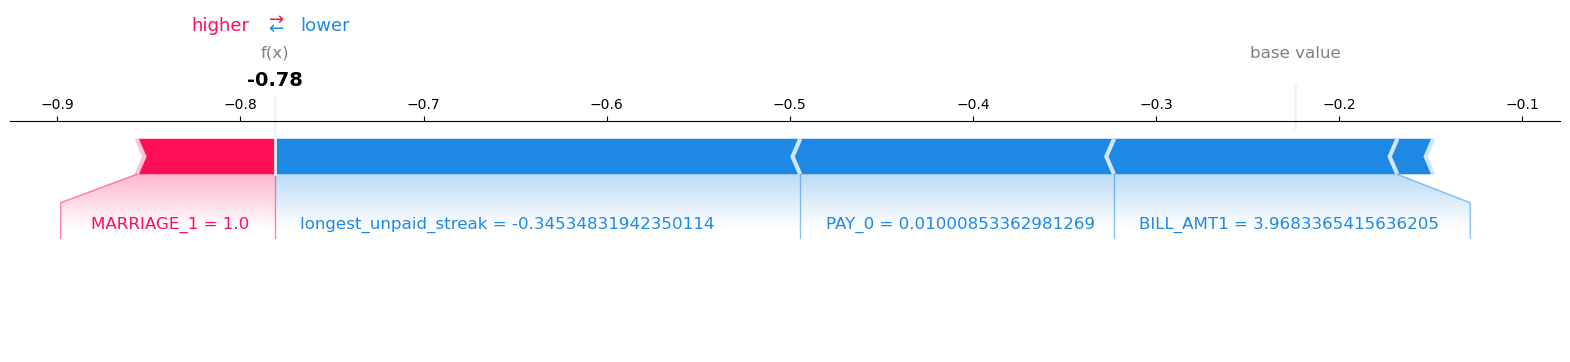

In [88]:
shap.force_plot(
    lgbm_explainer.expected_value[1], # expected value for class 1. 
    test_lgbm_shap_values[1][ex_defaultN_index, :], # SHAP values associated with the example we want to explain
    X_test_transformed.iloc[ex_defaultN_index, :], # Feature vector of the example 
    matplotlib=True,
)

In [89]:
X_test_transformed.iloc[ex_defaultY_index]

PAY_0                    1.811081
PAY_2                    0.066240
BILL_AMT1               -0.397301
longest_unpaid_streak    1.149589
MARRIAGE_1               0.000000
Name: 15154, dtype: float64

In [90]:
# hard prediction
random_search_LGBM.best_estimator_.named_steps["lgbmclassifier"].predict(X_test_transformed)[ex_defaultY_index]

1

In [91]:
# predict_proba
random_search_LGBM.best_estimator_.named_steps["lgbmclassifier"].predict_proba(X_test_transformed)[ex_defaultY_index]

array([0.18117055, 0.81882945])

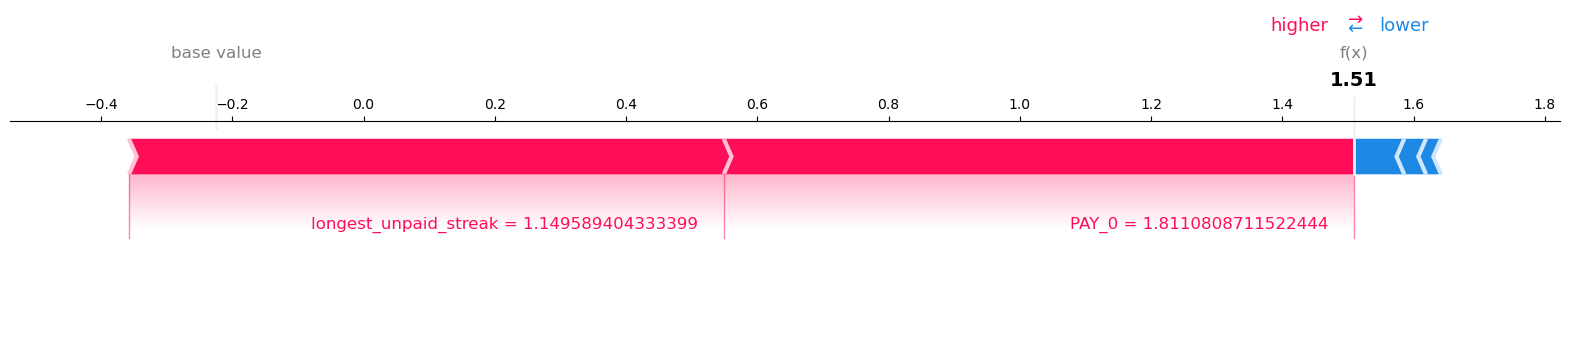

In [92]:
shap.force_plot(
    lgbm_explainer.expected_value[1], # expected value for class 1. 
    test_lgbm_shap_values[1][ex_defaultY_index, :], # SHAP values associated with the example we want to explain
    X_test_transformed.iloc[ex_defaultY_index, :], # Feature vector of the example 
    matplotlib=True,
)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 13. Summary of results <a name="13"></a>
rubric={reasoning}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook.
    
</div>

_Points:_ 8

The goal of this project is to correctly predict if a customer is going to default in the coming month. Since catching defaults is the first priority, recall is used as the scoring metric throughout our analysis. Recall is defined as the % of actual default can be predicted correctly by our model.

We made use of the Default of Credit Card Clients Dataset in which there is information such as
- Limit balance
- Education level
- Marriage status
- Repayment status
- Amount billed
- Amount paid
- Our target 'whether default payment happened next month'.

Each input field is called feature. On top base features, we performed feature engineering to create new ones based on the base features. We hope the new features would help in the model. The newly created features are:
- Longest unpaid streak
- Total bill amount
- Total paid amount
- Average payment ratio<br>
(One of them is very important. Refer to the later part of the report)

The data is split into two parts randomly: train set and test set. the train set was used to train our prediction model while the test set was left untouched until the end of model tuning to evaluate our model.

In order to achieve the goal, we have used different classification models:
- Logistic regression
- Naive Bayes
- Random Forest
- LightGBM

Since each model has its own pros and cons, we used feature selection and hyperparameter optimization to get the best model of its class with appropriate hyperparameters and number of features being used. In order to benefit from diversification, we applied a vote classifier that the average of 4 best models. The score from our train set is 71.3%. That means, theoretically, our model is able to predict 71.3% of default!

The breakdown of true positive, true negative, false positive and false negative are shown in the Confusion Matrix (Note: label 1 means default).

Although our recall score is pretty good, you may notice that there are a number of false negative too. i.e. low precision. From the Precision-Recall curve, you can see the trade-off between precision and recall. We can strike the balance by choosing an appropriate operating point later after thorough discussion.

Among the features available in the data file, our training process identified 5 features which are the most important to our prediction. They are shown in the SHAP plot. Among them Longest unpaid streak and PAY_0 are the most important features. i.e. they have the biggest influence in the model. Both of them are important indicators about a bad client based on the recent repayment record.

We applied our diversified averaged model to the test set for a final evaluation. The score is 65.8% which is slightly less than the score from the train set.

There are some idea that may further improve our models:
- More feature engineering such as "number of months with repayment issues"
- More classification models such as SVC
- Other feature selection technique such as forward / backward selection
- More extensive hyperparameter optimization with wider parameter distribution / grid
- Choosing an appropriate operation point

In [93]:
final = ['logreg_RFE', 'LGBM_opt', 'NB_opt', 'RF_opt', 'averaged']
df = pd.DataFrame(combined_results_opt.loc['test_recall', final])
df.columns = ['Recall Score (train set)']
df.index = ['Logistic Regression', 'LightGBM', 'Naive Bayes', 'Random Forest', 'AVERAGED MODEL']
df


,Recall Score (train set)
Logistic Regression,0.642
LightGBM,0.628
Naive Bayes,0.865
Random Forest,0.613
AVERAGED MODEL,0.713


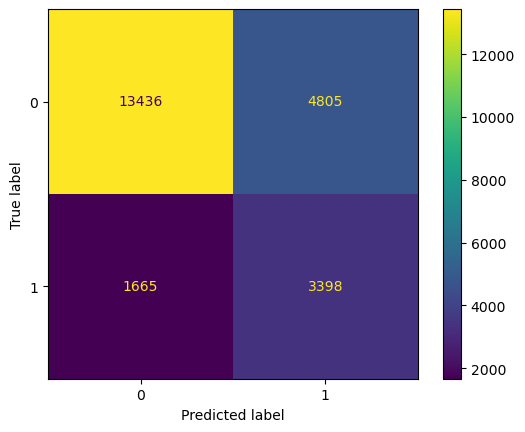

In [94]:
ConfusionMatrixDisplay.from_estimator(averaged_model, X_train, y_train )

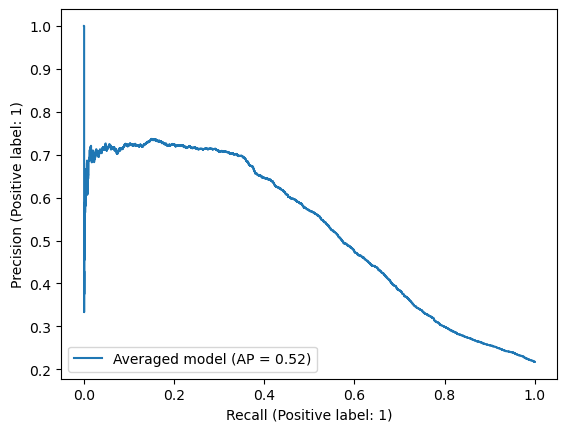

In [95]:
PrecisionRecallDisplay.from_estimator(averaged_model, X_train, y_train,name = "Averaged model")

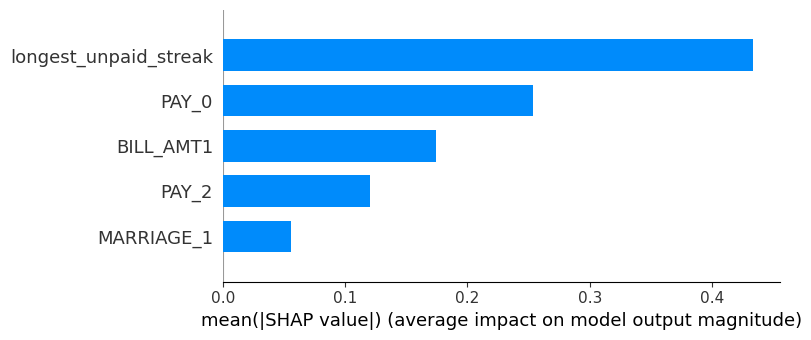

In [96]:
shap.summary_plot(training_shap[1], X_train_transformed, plot_type = 'bar')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 14. Creating a data analysis pipeline (Challenging)
rubric={reasoning}

**Your tasks:**
- In 522 you learned how build a reproducible data analysis pipeline. Convert this notebook into scripts and create a reproducible data analysis pipeline with appropriate documentation. Submit your project folder in addition to this notebook on GitHub and briefly comment on your organization in the text box below.
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 15. Your takeaway from the course (Challenging)
rubric={reasoning}

**Your tasks:**

What is your biggest takeaway from this course? 
    
</div>

_Points:_ 0.25

We really appreciate how this course built upon the previous course 571. Specifically, while 571 taught us the basic steps of setting up an ML pipeline (basic ML-in-a-can so to speak), this course helped us to understand what our models are actually doing during fitting, how to pick a model intelligently, how to improve models through feature engineering and selection, and how to effectively interpret our models both in terms of performance and the factors/ feature weights composing each decision. 

We feel this course in particular helped us move on from simply replicating basic ML workflows towards being legitimate ML practitioners capable of producing nuanced, well conceived, optimized models (still a ways to go here of course, but good steps forward!)

<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart, run all and export a PDF before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your plots on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for MDS,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
    
After running all the cells,
export a PDF of the notebook (preferably the WebPDF export)
and upload this PDF together with the ipynb file to Gradescope
(you can select two files when uploading to Gradescope)
</div>

---

## Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Do you have any feedback on the lab you be willing to share? For example, any part or question that you particularly liked or disliked?

#Ans: